In [348]:
%matplotlib inline

# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Files to Load 
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City Data
city_data_df = pd.read_csv(city_data)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [349]:
# Read the Ride Data
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [350]:
# Combine the data into a single dataset
pyber_data = pd.merge(ride_data_df, city_data_df, on="city", how="left")
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [351]:
## City Type (Urban, Suburban, Rural)
city_type = city_data_df.set_index("city")["type"]

city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [352]:
# Create dataframe from above series
city_df = pd.DataFrame({"Average Fare Per City":average_fare,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type, "Number of Rides": total_rides
})
print(city_df)

                      Average Fare Per City  Number of Drivers City Type  \
Amandaburgh                       24.641667                216     Urban   
Barajasview                       25.332273                572     Urban   
Barronchester                     36.422500                176  Suburban   
Bethanyland                       32.956111                396  Suburban   
Bradshawfurt                      40.064000                 70     Rural   
Brandonfort                       35.437368                190  Suburban   
Carriemouth                       28.314444               1404     Urban   
Christopherfurt                   24.501852               1107     Urban   
Colemanland                       30.894545                506  Suburban   
Davidfurt                         31.995882                391  Suburban   
Deanville                         25.842632                931     Urban   
East Aaronbury                    25.661111                 63  Suburban   
East Danielv

## Bubble Plot of Ride Sharing Data

In [353]:
# Urban
urban = city_df.loc[city_df["City Type"]== "Urban"]

# Suburban
suburban = city_df.loc[city_df["City Type"]== "Suburban"]

# Rural
rural = city_df.loc[city_df["City Type"]== "Rural"]

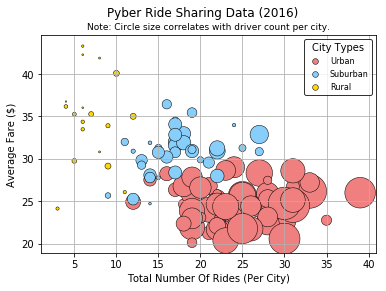

In [354]:
# Obtain data frames for Type of City (urban_rural,suburban) and then group data frames by city
# Urban calculations of ride count, fare average, driver count (s as in size)

# Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare Per City"], color = "lightcoral", edgecolors="black", s = urban["Number of Drivers"]*.5, label = "Urban", alpha = 1, marker = "o", linewidth = 0.5)

# Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare Per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*.5, label = "Suburban", alpha = 1, marker = "o", linewidth = 0.5)

# Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare Per City"], color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*.5, label = "Rural", alpha = 1, marker = "o", linewidth = 0.5)

# Set x & y limits 
#plt.xlim(5, 41, 45)
#plt.ylim(20, 45, 50) 

# Add titles, x axis label and y axis label.
plt.suptitle("Pyber Ride Sharing Data (2016)", fontsize=12)
plt.title("Note: Circle size correlates with driver count per city.", fontsize = 9)
plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add legend
lgnd = plt.legend(frameon = True, title= "City Types", fontsize = 8, edgecolor = 'black', loc="best")
lgnd.legendHandles[0]._sizes = [33]
lgnd.legendHandles[1]._sizes = [33]
lgnd.legendHandles[2]._sizes = [33]

# Save Figure
plt.savefig("Images/Bubble Ride Sharing Data.png")

# Add grid
plt.grid()

# Show plot
plt.show()

## Total Fares by City Type

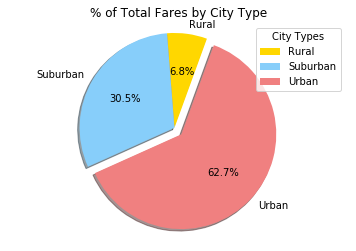

In [359]:
#group by type to be used by all pie charts
by_type = pyber_data.groupby("type")["type", "fare", "ride_id", "driver_count"]

#total fare by city
fare_sum = by_type.sum()["fare"]

# Set the colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = [0 , 0, 0.1]

# Build Pie Chart
plt.pie(fare_sum, startangle = 70, colors = colors, explode = explode, labels = ["Rural", "Suburban", "Urban"], autopct = "%1.1f%%", shadow = True)

# Add title
plt.title("% of Total Fares by City Type")

# Add legend
plt.legend(title = "City Types", loc = "upper right")

# Tell Matplotlib that we want the chart to have equal axes
plt.axis("equal")

# Save figure
plt.savefig("Images/Total Fares by City Type.png")

# Show the pie chart
plt.show()

## Total Rides by City Type

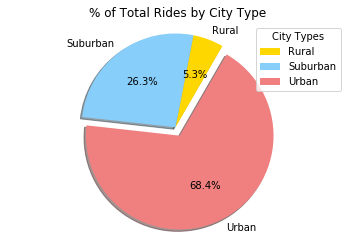

In [356]:
# number of ride per city type
ride_count = by_type.count()["ride_id"]
explode = [0 , 0, 0.1]

# Build Pie Chart
plt.pie(ride_count, startangle = 60, explode = explode, colors = colors, labels = ["Rural", "Suburban", "Urban"], autopct = "%1.1f%%", shadow = True)

# Add title
plt.title("% of Total Rides by City Type")

# Add legend
plt.legend(title = "City Types", loc = "upper right")

# Tell Matplotlib that we want the chart to have equal axes
plt.axis("equal")

# Save figure
plt.savefig("Images/Total Rides by City Type.png")

# Show the pie chart
plt.show()


## Total Drivers by City Type

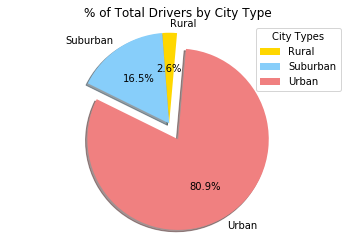

In [358]:
# of driver per city type
driver_sum = 100 * city_data_df.groupby(['type']).sum()["driver_count"] / city_data_df['driver_count'].sum()
explode = [0 , 0, 0.2]

# Build Pie Chart
plt.pie(driver_sum, startangle = 85, explode = explode, colors = colors, labels = ["Rural", "Suburban", "Urban"], autopct = "%1.1f%%", shadow = True)

# Add title
plt.title("% of Total Drivers by City Type")

# Add legend
plt.legend(title = "City Types", loc = "upper right")

# Tell Matplotlib that we want the chart to have equal axes
plt.axis("equal")

# Save figure
plt.savefig("Images/Total Drivers by City Type.png")

# Show the pie chart
plt.show()
